Tsalisa Camila - 0706022210055

ADULT INCOME DATASET

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [17]:
## untuk load kumpulan data dari URL web menggunakan pd.read_csv(). Ini akan membaca kumpulan data ke dalam pandas DataFrame
url_adult = r'https://raw.githubusercontent.com/tsalisacamila/Data-Mining/refs/heads/main/adult.csv'
df_adult = pd.read_csv(url_adult)

In [18]:
df_adult.head()

# menampilkan 5 baris pertama secara default

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [274]:
#menampilkan ringkasan informasi tenatang DataFrame
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [275]:
#memberikan ringkasan statistik deskriptif dari kolom numerik data / mendeskripsikan data
df_adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [276]:
#menghapus baris dengan datag yang hilang
df_adult.dropna(inplace=True)
#memeriksa kembali jumlah nilai hilang di setiap kolomnya
df_adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [278]:
#untuk menampilkan nilai unik dari setiap kolom yang disebutkan dalam daftar ['age', 'workclass', 'fnlwgt', ...] di dalam df_adult.
for column in ['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']:
    print(df_adult[column].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-

In [281]:
# menampilkan tipe data dari setiap kolom(df_adult)
print(df_adult.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


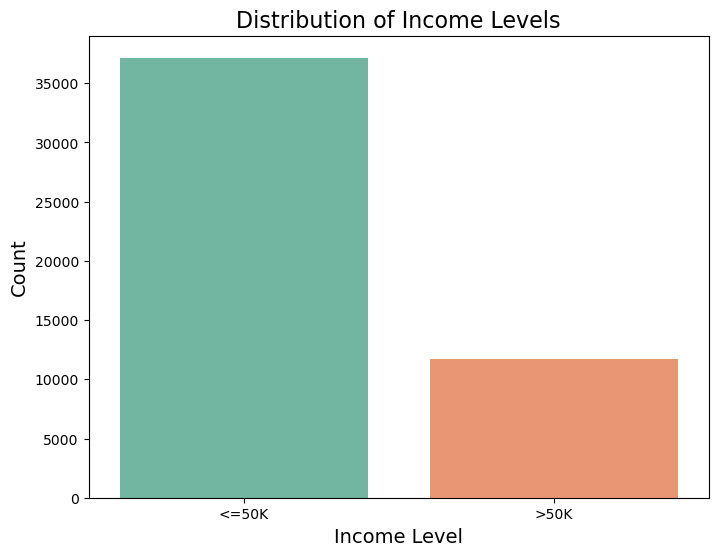

In [285]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_adult, x='income', palette='Set2')

plt.title('Distribution of Income Levels', fontsize=16)
plt.xlabel('Income Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#untuk membuat barplot dan menampilkan level income dalam dataset df_adult

In [286]:
label_encoders = {}
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']  # Columns you want to encode
for col in categorical_cols:
    le = LabelEncoder()
    df_adult[col] = le.fit_transform(df_bc[col])
    label_encoders[col] = le

#mengoversi kategorial dalam dataset df_adult

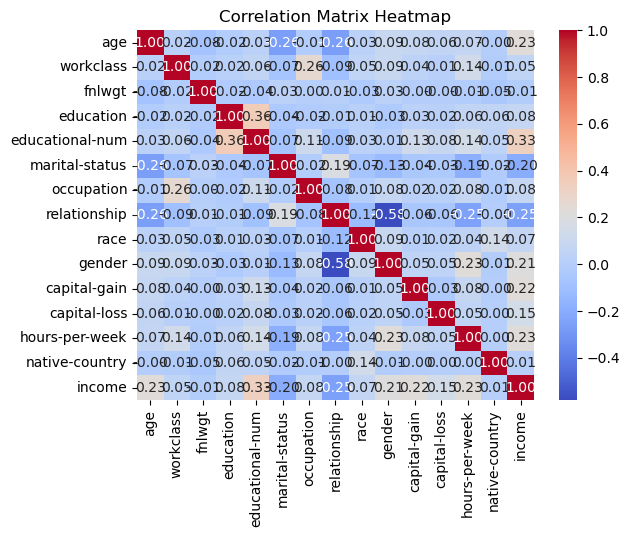

In [287]:
sns.heatmap(df_adult.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#untuk membuat heatmap korelasi dari df_adult

In [288]:
#split data
X = df_adult.drop('income', axis=1)
y = df_adult['income']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
X_train.shape, X_test.shape 
#menunjukan jumlah baris dan kolom

((39073, 14), (9769, 14))

Decision Tree -Entropy

In [291]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

# untuk menggunakan model decision tree classifier dengan kriteria entropy sbg pengukur pemisahan data

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [293]:
y_pred_en = clf_en.predict(X_test)

#untuk menghasilkan prediksi

In [294]:
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

# menghitung dan menampilkan akurasi model

Model accuracy score with criterion entropy: 0.8449


In [296]:
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_en.score(X_test, y_test)))

#untuk menampilkan akurasi model pada training set dan test set

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'X[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'X[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.125, 0.375, 'X[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'X[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'X[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.375, 'X[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, 'entropy = 0.987\nsamples = 

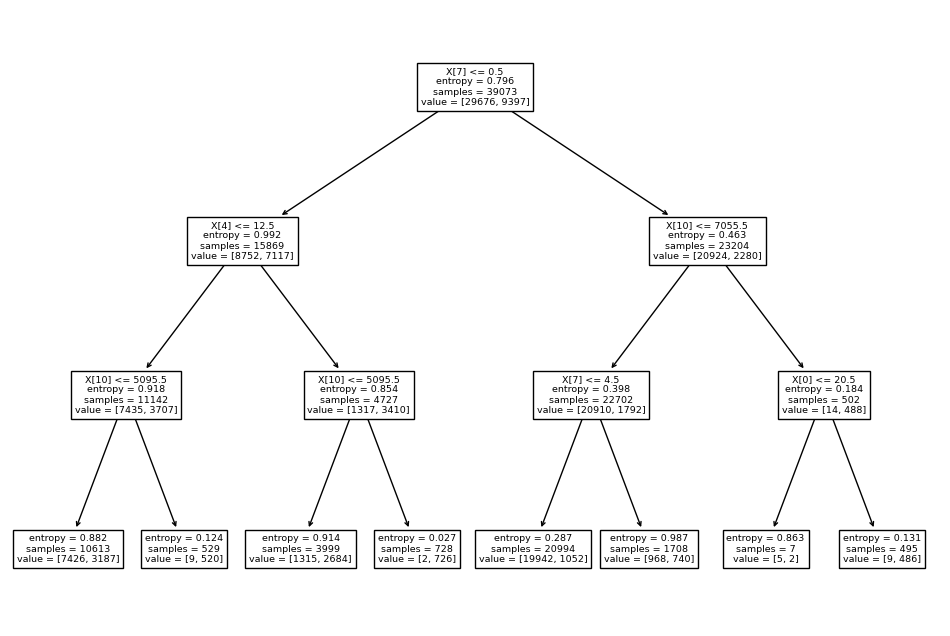

In [297]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [299]:
print(classification_report(y_test, y_pred_en))

#visualize classification report

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



Decision Tree -Gini

In [300]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [301]:
y_pred_gini = clf_gini.predict(X_test)

In [302]:
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.8449


In [303]:
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_gini.score(X_test, y_test)))

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'X[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'X[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.125, 0.375, 'X[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'X[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'X[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.375, 'X[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, 'gini = 0.491\nsamples = 1708\nvalue = [968, 740]'),
 Text(0.8

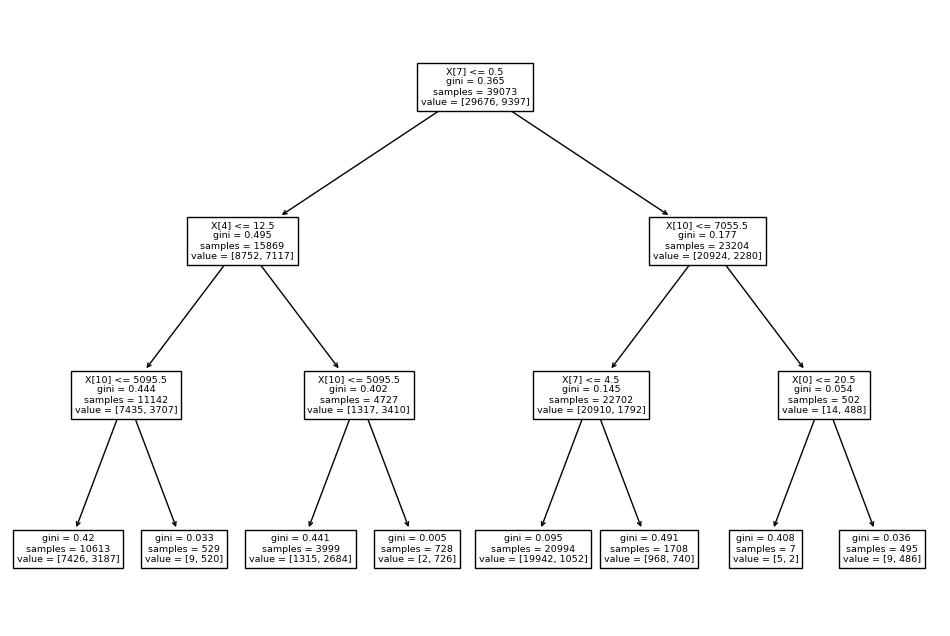

In [304]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [305]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



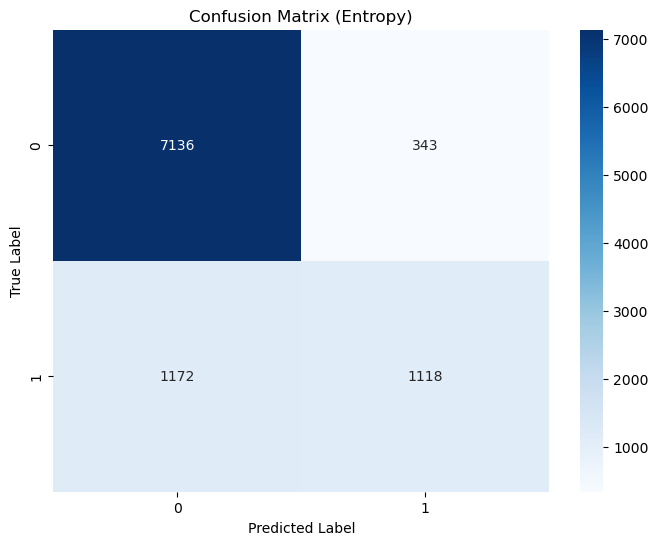

In [306]:
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Entropy)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#membuat confussion matrix sbg visualisasi kinerja Decision tree dengan kriteria Entropy

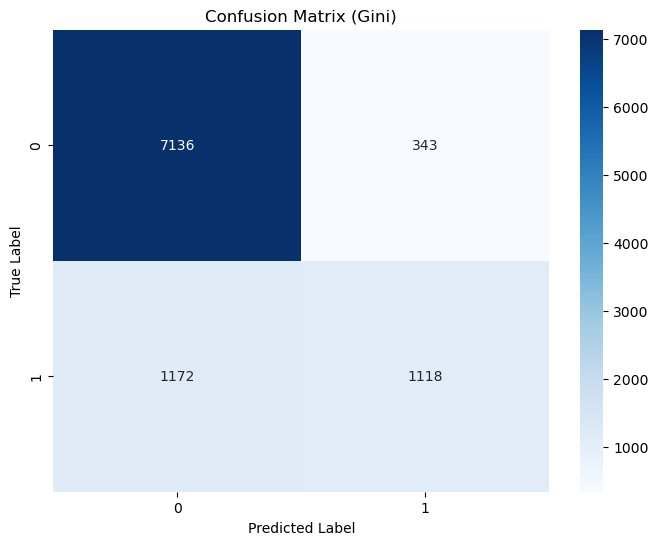

In [307]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Gini)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#membuat confussion matrix sbg visualisasi kinerja Decision tree dengan kriteria Gini

Naive Bayes

In [310]:
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [311]:
nb_y_pred = nb_classifer.predict(X_test)

In [312]:
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.7994


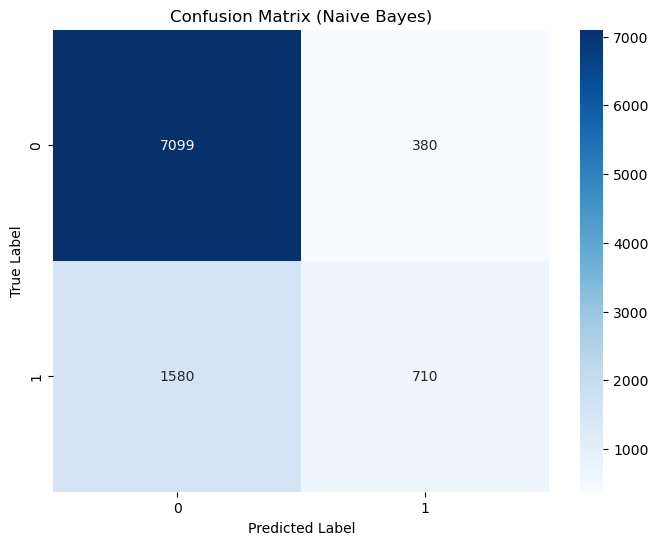

In [313]:
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [314]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [315]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7479
           1       0.62      0.30      0.41      2290

    accuracy                           0.79      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769

Accuracy: 0.7925069096120381


Logistic Regression

In [316]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [317]:
y_pred_log = log_reg_model.predict(X_test)

In [318]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_log))

Accuracy: 0.7925069096120381
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7479
           1       0.62      0.30      0.41      2290

    accuracy                           0.79      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769



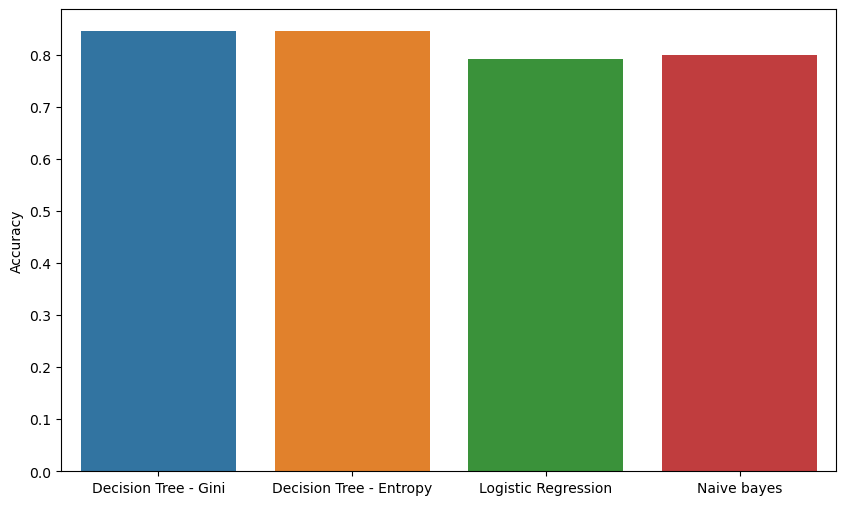

Decision Tree - Gini: 0.84
Decision Tree - Entropy: 0.84
Logistic Regression: 0.79
Naive bayes: 0.80


In [319]:
accuracy_scores = {
    "Decision Tree - Gini": accuracy_score(y_test, y_pred_gini),
    "Decision Tree - Entropy": accuracy_score(y_test, y_pred_en),
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Naive bayes": accuracy_score(y_test, nb_y_pred)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.ylabel("Accuracy")
plt.show()

for model, score in accuracy_scores.items():
    print(f"{model}: {score:.2f}")

Based on the visualization, Decision Tree has the higher score. So we can conclude that Decision Tree visualization model is better than the other two models (Logistic Regression and Naive Bayes)